In [1]:
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import Model_Arch as arch

In [4]:
plt.style.use('seaborn')

In [5]:
knee_osteoarthritis = {
    0 : 'Healthy',
    1 : 'Doubtful',
    2 : 'Minimal',
    3 : 'Moderate',
    4 : 'Severe'
}

knee_osteoarthritis_rev = {
    'Healthy' : 0,
    'Doubtful' : 1,
    'Minimal' : 2,
    'Moderate' : 3,
    'Severe' : 4
}

## Check dataset

Image Class -> 0(Healthy)


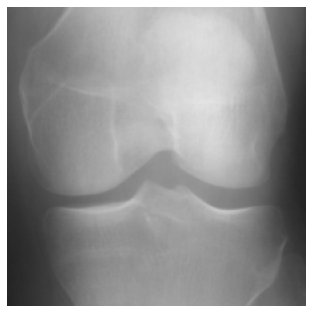

In [6]:
img = image.load_img('./Dataset/train/0/9001695L.png')

print(f'Image Class -> {0}({knee_osteoarthritis[0]})')
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
img = image.img_to_array(img)
img.shape

(224, 224, 3)

## Build Train Image Generator

In [8]:
class TrainImageGenerator():

    def __init__(self, target_size, batch_size, class_mode):
        self.target_size = target_size
        self.batch_size = batch_size
        self.class_mode = class_mode
        
    def TrainGenerator(self):
        train_idg = image.ImageDataGenerator(
            rescale = 1./255,
        )

        train_generator = train_idg.flow_from_directory(
            './Dataset/train/',
            seed = 42,
            shuffle = True,
            target_size = self.target_size,
            batch_size = self.batch_size,
            class_mode = self.class_mode
        )

        return train_generator

In [9]:
trainimgGenerator = TrainImageGenerator((224,224),4,'categorical')
train_generator = trainimgGenerator.TrainGenerator()

Found 9786 images belonging to 5 classes.


## Create Validation Generator

In [10]:
class ValImageGenerator():

    def __init__(self, target_size, batch_size, class_mode):
        self.target_size = target_size
        self.batch_size = batch_size
        self.class_mode = class_mode
        
    def ValGenerator(self):
        val_idg = image.ImageDataGenerator(
            rescale = 1./255,
        )

        val_generator = val_idg.flow_from_directory(
            './Dataset/val/',
            seed = 42,
            shuffle = True,
            target_size = self.target_size,
            batch_size = self.batch_size,
            class_mode = self.class_mode
        )

        return val_generator

In [11]:
valimgGenerator = ValImageGenerator((224,224),4,'categorical')
val_generator = valimgGenerator.ValGenerator()

Found 7045 images belonging to 5 classes.


## Model Hyperparameters

In [12]:
EPOCHS = 20
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)
INPUT_SHAPE = (224, 224, 3)
LEARNING_RATE = 0.0001  # 0.00005
NO_OF_CLASSES = 5

In [13]:
#models_array = np.array(['ostroarthnet','resnet50','inceptionv3', 'mobilenet', 'xception'])
models_array = np.array(['ostroarthnet'])

## Callbacks and Checkpoints

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [15]:
checkpoint_path = './Model_Checkpoints'
if not os.path.exists(checkpoint_path):
    os.mkdir(checkpoint_path)
else:
    print("Folder Exists")

Folder Exists


In [16]:
model_hist_path = './Model_History'
if not os.path.exists(model_hist_path):
    os.mkdir(model_hist_path)
else:
    print("Folder Exists")

Folder Exists


In [17]:
for model_name in models_array:
    print(f"Model Name : {model_name}")
    
    model_checkpoint_path = checkpoint_path + '/' + model_name
    if not os.path.exists(model_checkpoint_path):
        os.mkdir(model_checkpoint_path)
    else:
        pass
    
    # Set Callbacks
    my_callbacks = [
                    ModelCheckpoint(filepath = f'{model_checkpoint_path}/{model_name}.ckpt',
                        monitor = 'val_acc',
                        verbose = 1,
                        save_weights_only=True,
                        save_best_only = True,
                        mode="max"
                    ),
                    EarlyStopping(monitor='val_loss',
                        patience=10,
                        verbose=0
                    ),
                    ReduceLROnPlateau(monitor='val_loss',
                        patience=10,
                        verbose=1
                    )
    ]

    model_class = arch.BuildModel(learning_rate=LEARNING_RATE,
                            input_shape=INPUT_SHAPE, 
                             no_of_classes=NO_OF_CLASSES)
    
    if(model_name == 'ostroarthnet'):
        model = model_class.OsteoArthNet()
    else:
        model = model_class.generate_model(base_model_name=model_name)

    #model_class.model_info()
    hist = model_class.train_model(train_generator, val_generator, EPOCHS,[my_callbacks])
    np.save(f'{model_hist_path}/{model_name}.npy',hist.history)
    print("\n\n")

Model Name : ostroarthnet
Epoch 1/20
2447/2447 [==============================] - 299s 118ms/step - loss: 1.4865 - acc: 0.3569 - val_loss: 1.6672 - val_acc: 0.3451

Epoch 00001: val_acc improved from -inf to 0.34507, saving model to ./Model_Checkpoints/ostroarthnet\ostroarthnet.ckpt
Epoch 2/20
2447/2447 [==============================] - 153s 62ms/step - loss: 1.4304 - acc: 0.3708 - val_loss: 1.8177 - val_acc: 0.2355

Epoch 00002: val_acc did not improve from 0.34507
Epoch 3/20
2447/2447 [==============================] - 154s 63ms/step - loss: 1.2893 - acc: 0.4349 - val_loss: 1.3134 - val_acc: 0.4345

Epoch 00003: val_acc improved from 0.34507 to 0.43449, saving model to ./Model_Checkpoints/ostroarthnet\ostroarthnet.ckpt
Epoch 4/20
2447/2447 [==============================] - 155s 63ms/step - loss: 1.1119 - acc: 0.5219 - val_loss: 1.3253 - val_acc: 0.4211

Epoch 00004: val_acc did not improve from 0.43449
Epoch 5/20
2447/2447 [==============================] - 155s 63ms/step - loss: 0

In [ ]:
  model_class = BuildModel(learning_rate=LEARNING_RATE,
                            input_shape=INPUT_SHAPE, 
                             no_of_classes=NO_OF_CLASSES)
custom_model = model_class.custom_model()

In [ ]:
custom_model.load_weights(f'{checkpoint_path}/custom.ckpt')